# Machine Learning Exercise 2 - Logistic Regression
Programming exercise for Andrew Ng's Machine Learning Class on Coursera written in python 3.4.

## Logistic Regression
Task: build a classification model that estimates an applicant's probability of admission based on the scores from two exams.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=4, suppress=True)

In [2]:
# load data
df = pd.read_csv('./machine-learning-ex2/ex2/ex2data1.txt', names=['score1', 'score2', 'Admission'])

# check for invalid numbers
df['Admission'].unique()

# translate numbers to admission status. np.where(,,) is equivalent to ifelse(,,) in R, however, no such function in pandas.
df['Status'] = np.where(df['Admission'].values, 'Admitted', 'Not admitted')
df.head()

,score1,score2,Admission,Status
0,34.623660,78.024693,0,Not admitted
1,30.286711,43.894998,0,Not admitted
2,35.847409,72.902198,0,Not admitted
3,60.182599,86.308552,1,Admitted
4,79.032736,75.344376,1,Admitted


### Plotting the data

In [3]:
import seaborn as sns
sns.set(style='white')

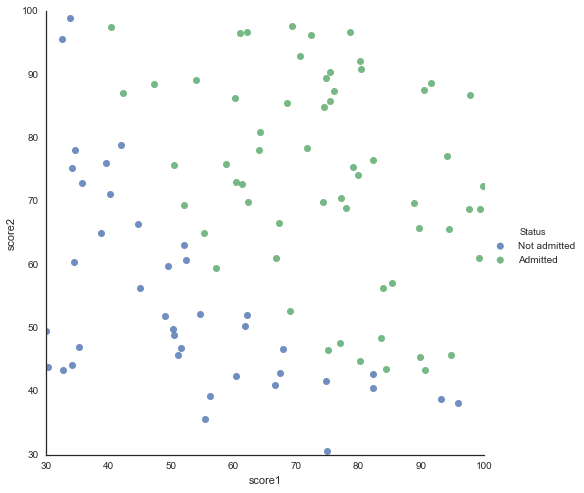

In [4]:
# plot the categorical output in seaborn (easier than matplotlib)
ax = sns.lmplot(x='score1', y='score2', hue='Status', size=7, data=df, scatter_kws={'s':50}, fit_reg=False)
ax.set(xlim=(30, 100), ylim=(30, 100))

In [5]:
# plot the categorical output in matplotlib
def plotData(data, ax, x_label1, x_label2, x_title1, x_title2, y_label, pos, neg):
    colors = {neg: 'yellow', pos: 'black'}
    markers = {neg: 'o', pos: '*'}

    grouped = data.groupby(y_label)

    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x=x_label1, y=x_label2, label='{} = {}'.format(y_label, key), color=colors[key], marker=markers[key], s=100)

    plt.xlim(data[x_label1].min()*0.8, data[x_label2].max()*1.2)
    plt.ylim(data[x_label2].min()*0.8, data[x_label2].max()*1.2)
    plt.legend(frameon=True)
    plt.xlabel(x_title1)
    plt.ylabel(x_title2)

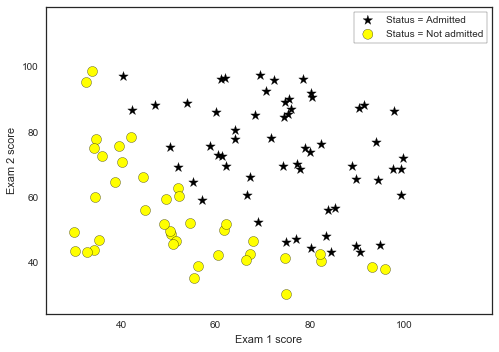

In [6]:
fig, ax = plt.subplots()
plotData(df, ax, 'score1', 'score2', 'Exam 1 score', 'Exam 2 score', 'Status', 'Admitted', 'Not admitted')

### Implement Logistic Regression (no regularization)

In [7]:
# implement the sigmoid function
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

In [8]:
# implement the cost function.
def costFunction(theta, X, y):
    h = sigmoid(X.dot(theta))
    return ((1/len(X)) * (-y.dot(np.log(h)) - (1-y).dot(np.log(1-h))))

In [9]:
def gradient(theta, X, y):
    h = sigmoid(X.dot(theta))
    return ((1/(len(X)) * (h - y).dot(X)))

In [10]:
# get cost function
X = np.c_[np.ones(df.shape[0]), df['score1'].values , df['score2'].values]
y = df['Admission'].values

# initialize theta, define alpha
theta = np.zeros(X.shape[1])

cost = costFunction(theta, X, y)
grad = gradient(theta, X, y)

print('Cost Function: ', cost)
print('Gradient: ', grad)

Cost Function:  0.69314718056
Gradient:  [ -0.1    -12.0092 -11.2628]


### Minimize Cost Function with scipy

In [11]:
# for the functions called, theta must be the first argument, otherwise won't work.
# no need to set a learning rate alpha
from scipy.optimize import minimize
res1 = minimize(costFunction, theta, args=(X, y), jac=gradient, options={'maxiter':400})
res1.message
print('Cost Function: ', res1.fun)
print('Parameters with no regularization: ', res1.x)

Cost Function:  0.20349770158944386
Parameters with no regularization:  [-25.1613   0.2062   0.2015]


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log


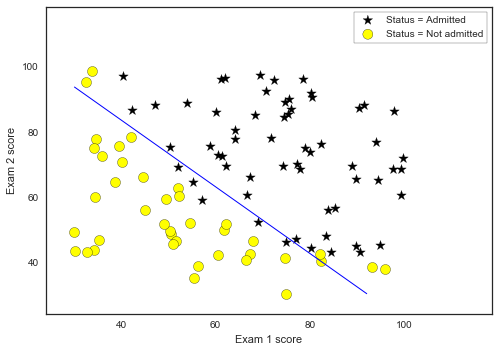

In [12]:
fig, ax = plt.subplots()
plotData(df, ax, 'score1', 'score2', 'Exam 1 score', 'Exam 2 score', 'Status', 'Admitted', 'Not admitted')
# meshgrid creates two square matrix of values from min to max, here the shape is (50, 50)
xx1, xx2 = np.meshgrid(np.linspace(X[:,1].min(), X[:,1].max()), np.linspace(X[:,2].min(), X[:,2].max()))

# stack the X values vertically. hstack won't work, must use np.c_
# xx1.ravel() flatterns xx1 to a 50*50 vector
xx =  np.c_[np.ones(xx1.ravel().shape), xx1.ravel(), xx2.ravel()]
h = sigmoid(xx.dot(res1.x))
# shape h from 50*50 back to (50, 50) matrix
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')

### Evaluate Logistic  Regression

In [13]:
# return 0 or 1 for admission status
def predict(X, theta, threshold=0.5):
    return np.where(sigmoid(X.dot(theta)) <= threshold, 0, 1)

In [14]:
predict(X, res1.x)

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1])

In [15]:
accuracy = np.sum((predict(X, res1.x, 0.5) - y) == 0) / y.shape[0] * 100
print('Training accuracy: {}%'.format(accuracy))

Training accuracy: 89.0%


In [16]:
test_X = np.array([1, 45, 85])
p = sigmoid(test_X.dot(res1.x))
p

0.77629072405889399

### Solve by sklearn

In [17]:
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('./machine-learning-ex2/ex2/ex2data1.txt', names=['score1', 'score2', 'Admission'])

# logistic regression with l2 regularization (default) (analytical solution, non-sparse outputs, no feature selection)
log_reg = LogisticRegression()

# logistic regression with l1 regularization (computationally-inefficient on non-sparse cases, sparse output, built-in feature selection)
log_reg_l1 = LogisticRegression(penalty='l1')

# logistic regression with very small regularization: C = 1/lambda is large
log_reg_C = LogisticRegression(C=10000000)

log_reg.fit(df[['score1', 'score2']], df['Admission'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
log_reg_l1.fit(df[['score1', 'score2']], df['Admission'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
log_reg_C.fit(df[['score1', 'score2']], df['Admission'])

LogisticRegression(C=10000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [20]:
print('parameters for logistic regression with l2 penalty (default): ', log_reg.intercept_[0], log_reg.coef_)
print('parameters for logistic regression with l1 penalty: ', log_reg_l1.intercept_[0], log_reg_l1.coef_)
print('parameters for logistic regression with small regularization', log_reg_C.intercept_[0], log_reg_C.coef_)

parameters for logistic regression with l2 penalty (default):  -3.8997779447 [[ 0.0384  0.031 ]]
parameters for logistic regression with l1 penalty:  -11.5645926001 [[ 0.0978  0.0917]]
parameters for logistic regression with small regularization -24.9559696557 [[ 0.2046  0.1998]]


In [21]:
p1 = log_reg.predict(np.array([45, 85]).reshape(1, 2))
p1[0]

1

In [22]:
score1 = np.round(log_reg.score(df[['score1', 'score2']], df['Admission'])*100, 2)
print('Training accuracy by sklearn: {}%'.format(score1))

Training accuracy by sklearn: 87.0%


## Regularized Logistic Regression

In [23]:
# load data
df2 = pd.read_csv('./machine-learning-ex2/ex2/ex2data2.txt', names=['test1', 'test2', 'result'])
df2['result'] = df2['result'].astype('str')
df2.tail()

,test1,test2,result
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0
117,0.632650,-0.030612,0


### Visualize the data

(-1, 1.5)

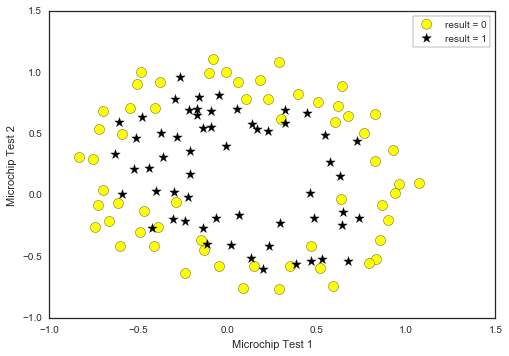

In [24]:
fig2, ax2 = plt.subplots()
plotData(df2, ax2, 'test1', 'test2', 'Microchip Test 1', 'Microchip Test 2', 'result', '1', '0')
ax2.set_xlabel('Microchip Test 1')
ax2.set_ylabel('Microchip Test 2')
ax2.set_xlim(-1, 1.5)
ax2.set_ylim(-1, 1.5)

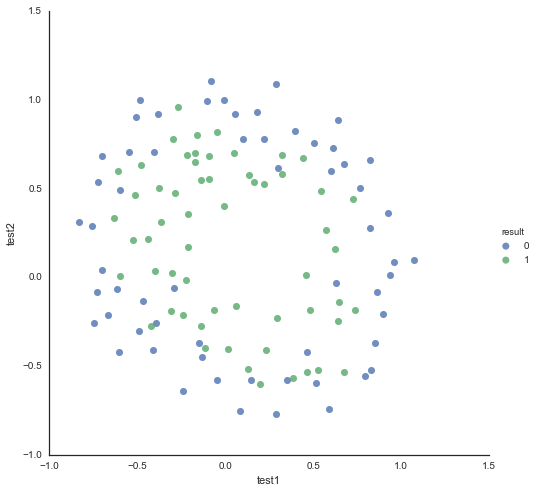

In [25]:
# plot the data with seaborn
ax2 = sns.lmplot(x='test1', y='test2', hue='result', size=7, data=df2, fit_reg=False, scatter_kws={'s':50})
ax2.set(xlim=(-1, 1.5),ylim=(-1, 1.5))

In [26]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial and interaction features with degree=6
poly = PolynomialFeatures(6)
X2 = df2.iloc[:, 0:2].values
XX2 = poly.fit_transform(df2.iloc[:, 0:2])
y2 = df2['result'].astype(int).values
XX2.shape, y2.shape

((118, 28), (118,))

In [27]:
# implement regularized cost function
def costFunctionReg(theta, reg, X, y):
    h = sigmoid(X.dot(theta))
    return ((1/len(X)) * ((-y.dot(np.log(h)) - (1-y).dot(np.log(1-h))) + (reg/2)*(np.sum(theta[1:]**2))))

In [28]:
def gradientReg(theta, reg, X, y):
    h = sigmoid(X.dot(theta))
    grad = ((1/(len(X)) * (h - y).dot(X))) + (reg/len(X)) * theta
    grad[0] = ((1/(len(X)) * (h - y).dot(X)))[0]
    return grad

In [29]:
# compute regularized cost function
init_theta = np.zeros(XX2.shape[1])
reg = 1
costFunctionReg(init_theta, reg, XX2, y2)

0.69314718055994529

In [30]:
reg_res = minimize(costFunctionReg, init_theta, args=(reg, XX2, y2), jac=gradientReg, options={'maxiter':400})
acc = np.sum(predict(XX2, reg_res.x) - y2 == 0) / y2.shape[0] * 100

print('Message: ', reg_res.message)
print('Cost function: ', reg_res.fun)
print('theta: ', reg_res.x)
print('Training accuracy: {}%'.format(acc))

Message:  Optimization terminated successfully.
Cost function:  0.5290027422869217
theta:  [ 1.2727  0.6256  1.181  -2.0192 -0.9176 -1.4319  0.1238 -0.3651 -0.357
 -0.1749 -1.4584 -0.0513 -0.616  -0.2746 -1.1928 -0.2427 -0.2057 -0.045
 -0.2778 -0.2953 -0.4561 -1.0438  0.0276 -0.2927  0.0154 -0.3276 -0.1439
 -0.9246]
Training accuracy: 83.05084745762711%


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


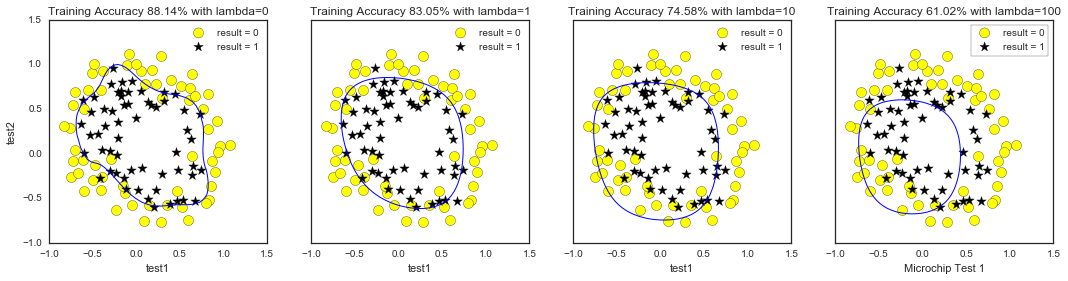

In [31]:
fig, axes = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(18, 4))

for i, C in enumerate([0, 1, 10, 100]):
    
    # plot the decision boundary
    plotData(df2, axes[i], 'test1', 'test2', 'Microchip Test 1', 'Microchip Test 2', 'result', '1', '0')

    # meshgrid creates two square matrix of values from min to max, here the shape is (118, 118)
    xx1, xx2 = np.meshgrid(np.linspace(X2[:,0].min(), X2[:,0].max()), np.linspace(X2[:,1].min(), X2[:,1].max()))

    reg_res = minimize(costFunctionReg, init_theta, args=(C, XX2, y2), jac=gradientReg, options={'maxiter':400})
    acc = np.round(np.sum(predict(XX2, reg_res.x) - y2 == 0) / y2.shape[0] * 100, 2)
    
    # stack the X values vertically. hstack won't work, must use np.c_
    # xx1.ravel() flatterns xx1 to a vector with length 118*118
    h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(reg_res.x))
    # shape h from 118*118 back to (118, 118) matrix
    h = h.reshape(xx1.shape)
    axes[i].contour(xx1, xx2, h, [0.5], linewidths=1, colors='b', )
    axes[i].set_title('Training Accuracy {}% with lambda={}'.format(acc, C))
    axes[i].set_xlim(-1, 1.5)
    axes[i].set_ylim(-1, 1.5)

### Solve by scikit-learn

In [32]:
C = [0.01, 0.1, 1, 10000]
models = []

for c in C:
    model = LogisticRegression(C=c)
    
    models.append(model.fit(df2.iloc[:,0:2], df2['result']))
    score = model.score(df2.iloc[:,0:2], df2['result'])
    
    print('Training accuracy for C = {}: '.format(c), np.round(score, 2))

Training accuracy for C = 0.01:  0.43
Training accuracy for C = 0.1:  0.53
Training accuracy for C = 1:  0.54
Training accuracy for C = 10000:  0.55


In [33]:
C = [0.01, 0.1, 1, 10000]
models = []

for i, c in enumerate(C):
    model = LogisticRegression(C=c)
    
    # use polynomial terms in XX2
    models.append(model.fit(XX2, df2['result']))
    score = model.score(XX2, df2['result'])
    
    print('Training accuracy for C = {}: '.format(c), np.round(score, 2))
    
# By comparison, polynomial features have higher score than linear features.

Training accuracy for C = 0.01:  0.61
Training accuracy for C = 0.1:  0.74
Training accuracy for C = 1:  0.83
Training accuracy for C = 10000:  0.87


In [34]:
# Select the best C using Grid-Search
from sklearn.model_selection import GridSearchCV

log_r = LogisticRegression()
clf = GridSearchCV(log_r, param_grid={'C': [0.01, 0.1, 1, 10000]})
clf.fit(XX2, df2['result'])

clf.best_estimator_, clf.best_params_

(LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False), {'C': 10000})